Felipe Augusto de Almeida

NUSP: 11312371

4) (Two-dimensional Voter model) Write a Python code for the two-dimensional voter model according
to the following prescription. Remark: this code presents an intuitive sequence of paths, but does not
constitute necessarily an efficient program.

In [355]:
import numpy as np
import random
import matplotlib.pyplot as plt

# (i) and (ii)
def run(L, T, R):
    voters, m_values, t_values, m_means = np.zeros((L, L)), [], np.arange(T), np.zeros(T)

    # (iii) and (iv)            
    def m():
        total = voters.sum()
        return (1 / L ** 2) * total

    # (v)
    for i in range(L):
        for j in range(L):
            r = random.uniform(0.0, 1.0)
            if r < 0.7:
                voters[i][j] = -1
            else:
                voters[i][j] = 1

    # creates a new voters array to avoid checks of corners
    new_voters = np.insert(voters, 0, voters[len(voters)-1], 0)
    new_voters = np.insert(new_voters, len(voters)-1, voters[0], 0)
    new_voters = np.insert(new_voters, len(voters)-1, voters[0][0], 1)
    new_voters = np.insert(new_voters, 0, voters[len(voters)-1][len(voters)-1], 1)

    # (vi)
    def vi():
        return random.uniform(0.0, 1.0)

    # (vii)
    def vii():
        for i in range(L):
            for j in range(L):
                r = vi()
                if r <= 0.25:
                    voters[i][j] = new_voters[i][j-1]
                elif r > 0.25 and r <= 0.50:
                    voters[i][j] = new_voters[i][j+1]
                elif r > 0.50 and r <= 0.75:
                    voters[i][j] = new_voters[i+1][j]
                elif r > 0.75 and r <= 1:
                    voters[i][j] = new_voters[i-1][j]

    # (viii)
    def viii():
        nonlocal m_means
        for i in range(T):
            vii()
            m_value = m() # (ix)
            m_values.append(m_value) # (x)

            m_means[i] = m_values[i] + m_means[i]

    # (xi)
    def xi():
        nonlocal m_means
        for i in range(R):
            viii()
        m_means = m_means/R

    xi()

    plt.plot(t_values, m_means)
    plt.xlabel('')
    plt.ylabel('m_means')
    plt.ylim(-1, 1)

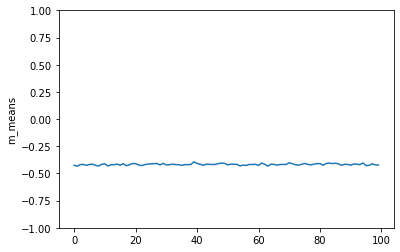

In [356]:
L, T, R = 100, 100, 5
run(L, T, R)

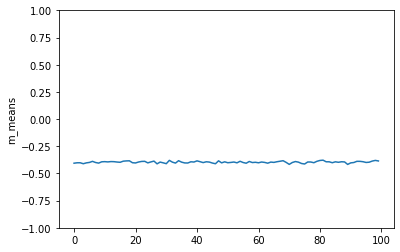

In [357]:
L, T, R = 100, 100, 50
run(L, T, R)

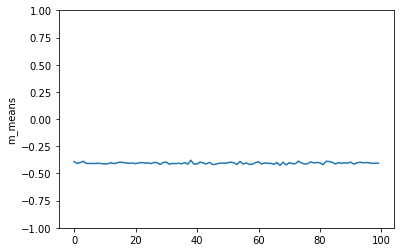

In [358]:
L, T, R = 100, 100, 500
run(L, T, R)